In [2]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import mlxtend 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [5]:
book = pd.read_csv("/content/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
book.shape

(2000, 11)

In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
book['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

In [11]:
book['YouthBks'].value_counts()

0    1505
1     495
Name: YouthBks, dtype: int64

In [12]:
book['CookBks'].value_counts()

0    1138
1     862
Name: CookBks, dtype: int64

In [13]:
book['DoItYBks'].value_counts()

0    1436
1     564
Name: DoItYBks, dtype: int64

In [14]:
book['RefBks'].value_counts()

0    1571
1     429
Name: RefBks, dtype: int64

In [15]:
book['ArtBks'].value_counts()

0    1518
1     482
Name: ArtBks, dtype: int64

In [16]:
book['GeogBks'].value_counts()

0    1448
1     552
Name: GeogBks, dtype: int64

In [17]:
book['ItalCook'].value_counts()

0    1773
1     227
Name: ItalCook, dtype: int64

In [18]:
book['ItalAtlas'].value_counts()

0    1926
1      74
Name: ItalAtlas, dtype: int64

In [19]:
book['ItalArt'].value_counts()

0    1903
1      97
Name: ItalArt, dtype: int64

In [20]:
book['Florence'].value_counts()

0    1783
1     217
Name: Florence, dtype: int64

In [21]:
# All the features are alreeady in numeric ,so no need for encoding in this dataset.

# Apriori Algorithm

In [22]:
frequent_itemsets = apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [24]:
rules = association_rules(frequent_itemsets,metric ="lift",min_threshold=0.7)  # min_thresholds is confidence i.e 70 %
rules.sort_values("lift",ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [25]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


array([[<Axes: title={'center': 'ChildBks'}>,
        <Axes: title={'center': 'YouthBks'}>,
        <Axes: title={'center': 'CookBks'}>],
       [<Axes: title={'center': 'DoItYBks'}>,
        <Axes: title={'center': 'RefBks'}>,
        <Axes: title={'center': 'ArtBks'}>],
       [<Axes: title={'center': 'GeogBks'}>,
        <Axes: title={'center': 'ItalCook'}>,
        <Axes: title={'center': 'ItalAtlas'}>],
       [<Axes: title={'center': 'ItalArt'}>,
        <Axes: title={'center': 'Florence'}>, <Axes: >]], dtype=object)

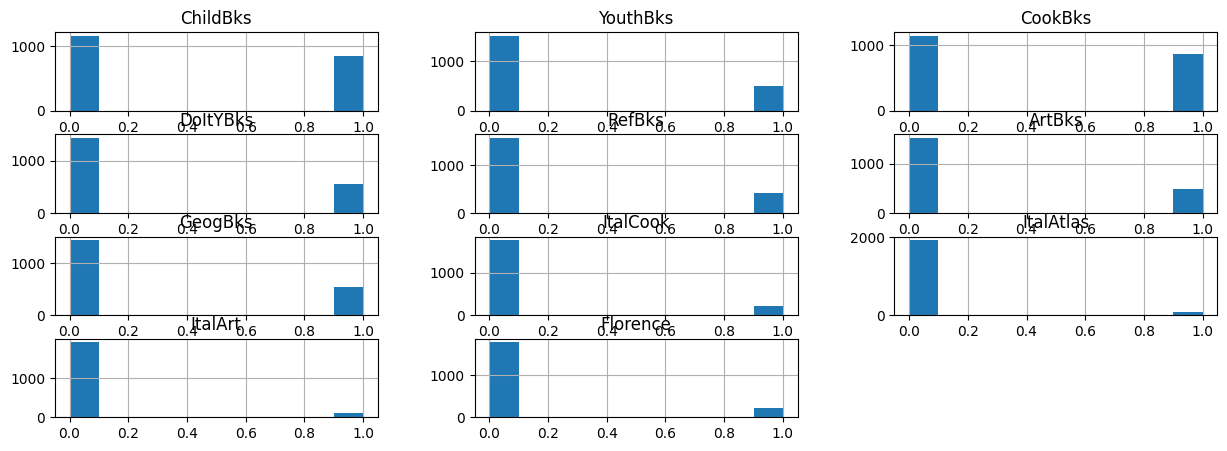

In [31]:
book.hist(figsize=(15,5))

(array([[1154.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          846.],
        [1505.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          495.],
        [1138.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          862.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          564.],
        [1571.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          429.],
        [1518.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          482.],
        [1448.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          552.],
        [1773.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          227.],
        [1926.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           74.],
        [1903.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           97.],
        [1783.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          217.]]),
 array([0. , 0.1, 0

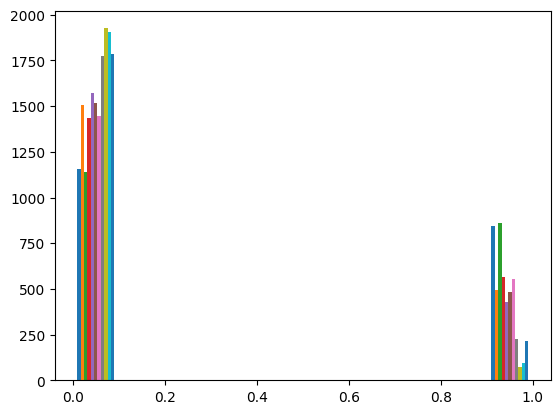

In [29]:
plt.hist(book)

# Movies

In [33]:
movies = pd.read_csv("/content/my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [37]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [44]:
movie= movies.iloc[:,6:15]

In [45]:
movie

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [46]:
frequent_itemsets = apriori(movie,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Patriot, Gladiator)"


In [47]:
rules = association_rules(frequent_itemsets,metric ="lift",min_threshold=0.7)  # min_thresholds is confidence i.e 70 %
rules.sort_values("lift",ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
32,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
37,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
71,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
69,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
68,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
47,(Green Mile),"(LOTR1, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
54,(LOTR1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
51,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
50,"(Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [54]:
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
2,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
71,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
72,(Green Mile),"(LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
73,(LOTR1),"(Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
74,(Harry Potter1),"(Green Mile, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [61]:
rules['ancedents'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['ancedents']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ancedents
71,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
32,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,2
69,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
68,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
66,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2


In [62]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [64]:

pivot = rules[rules['ancedents']>1].pivot(index = 'antecedents', 
                    columns = 'consequents', values= 'confidence')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(1.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile'),
  Text(3.5, 0, 'Green Mile,Harry Potter1'),
  Text(4.5, 0, 'Green Mile,LOTR1'),
  Text(5.5, 0, 'Green Mile,LOTR2'),
  Text(6.5, 0, 'Harry Potter1'),
  Text(7.5, 0, 'LOTR'),
  Text(8.5, 0, 'LOTR1'),
  Text(9.5, 0, 'LOTR1,Harry Potter1'),
  Text(10.5, 0, 'LOTR1,LOTR2'),
  Text(11.5, 0, 'LOTR2'),
  Text(12.5, 0, 'LOTR2,Harry Potter1'),
  Text(13.5, 0, 'Patriot')])

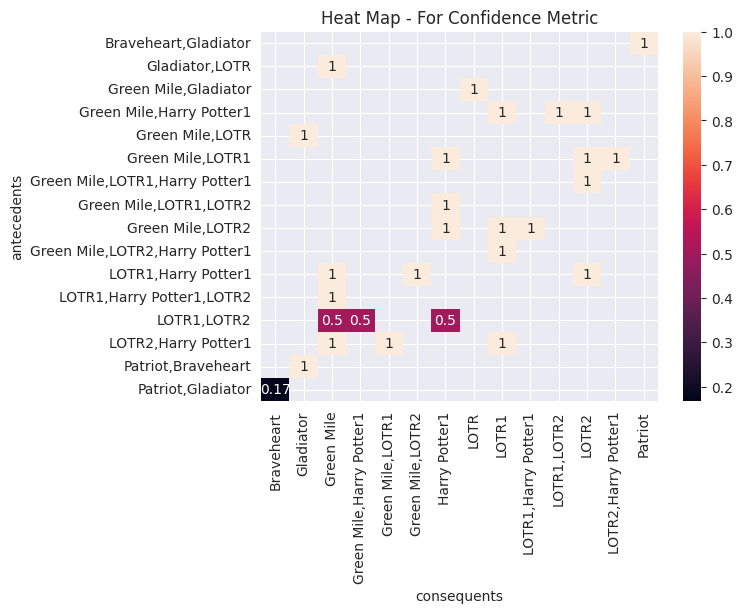

In [65]:
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)